customer churn prediction analysis for DEPI
team members:


1- Michael Mohab Soltan Nashed (leader)
eng.michaelsoltan@gmail.com
21077122

2- Hazem Mohamed Salem
Hazem.mohamedsm@gmail.com
21041541

3- Marwan Ahmed Salah Ahmed  
 marwanshehata328@gmail.com  
21083763

4- Kareem moataz mostafa mohamed elmahdy
Kareemmoataz16@gmail.com
21049214

5- Ibrahim emam mahmoud
Ibrahimelnogomy7@gmail.com
21000650

6- Mohamed tawfik hossam el din
Mohammed_20230458@fci.helwan.edu.eg
21093334



# Loading Dataset from kagglehub



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data preparation and preporcessing

In [3]:
# Load the dataset
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# === EXPLORATORY DATA ANALYSIS ===
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: \n {df.shape}")
print(f"\nColumns: \n {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 rows: \n ")
display(df.head())


=== DATASET OVERVIEW ===
Dataset Shape: 
 (7043, 21)

Columns: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# casting TotalCharges from object to float

In [4]:
# Dropping CustomerID since it will not be used
df = df.drop(columns=['customerID'])

# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df = df.drop_duplicates()


In [5]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# checking for outliers.

In [6]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")



tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


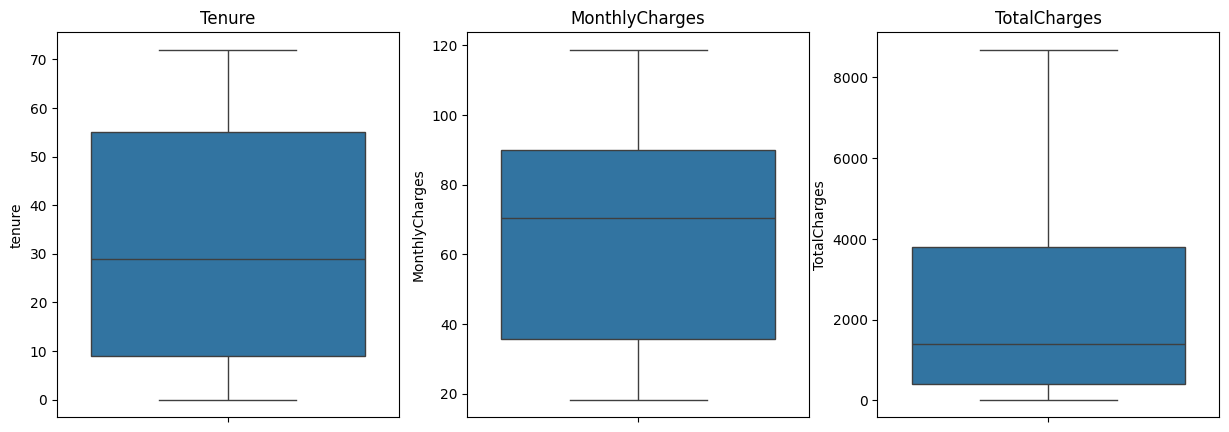

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(y=df['tenure'], ax=axes[0])
sns.boxplot(y=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(y=df['TotalCharges'], ax=axes[2])
axes[0].set_title("Tenure")
axes[1].set_title("MonthlyCharges")
axes[2].set_title("TotalCharges")
plt.show()


# Discriptive Analysis

=== CHURN DISTRIBUTION ===


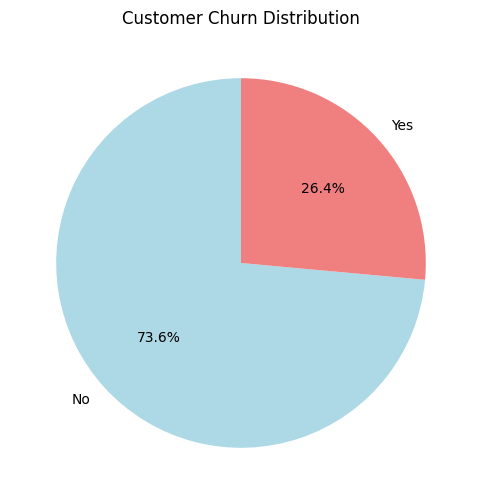

Churn Rate: 26.4%
Non-Churn: 5164 customers
Churn: 1857 customers


/tmp/ipython-input-370309333.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn Rate: {(churn_counts[1]/len(df))*100:.1f}%")
/tmp/ipython-input-370309333.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Non-Churn: {churn_counts[0]} customers")
/tmp/ipython-input-370309333.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn: {churn_counts[1]} customers")


In [8]:
# === 1. CHURN DISTRIBUTION PIE CHART ===
print("=== CHURN DISTRIBUTION ===")
plt.figure(figsize=(10, 6))
churn_counts = df['Churn'].value_counts()

labels = ['No', 'Yes']

plt.pie(churn_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Customer Churn Distribution')
plt.show()

print(f"Churn Rate: {(churn_counts[1]/len(df))*100:.1f}%")
print(f"Non-Churn: {churn_counts[0]} customers")
print(f"Churn: {churn_counts[1]} customers")

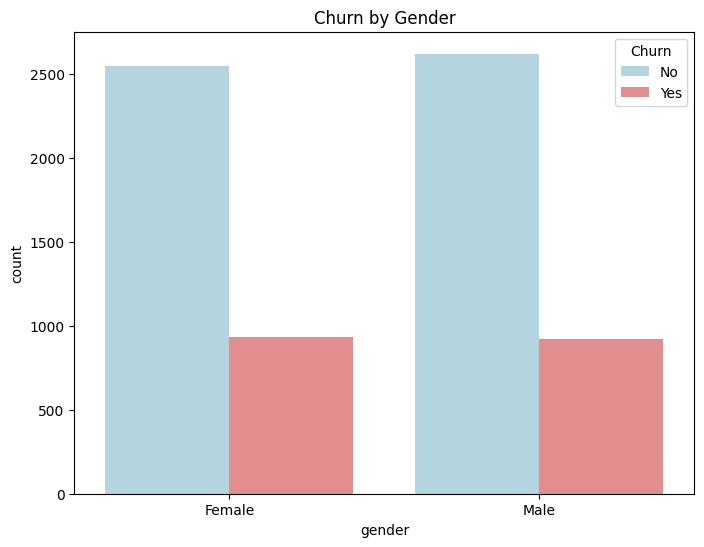

In [9]:
# === 2. GENDER VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Gender')
plt.show()

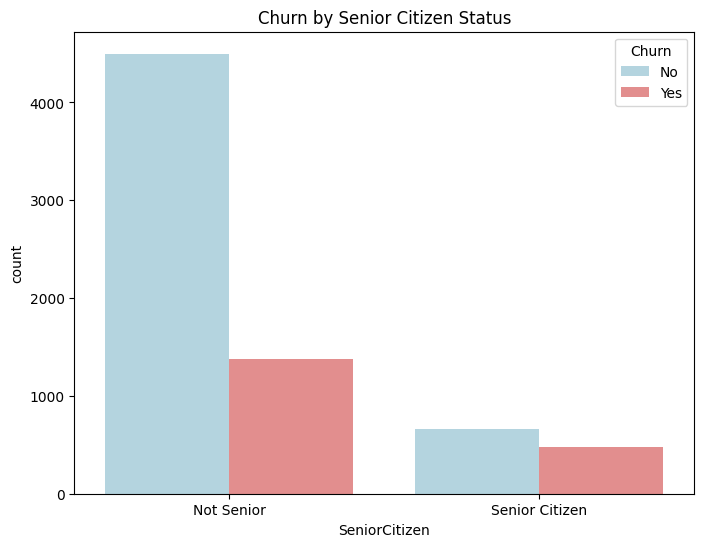

In [10]:
# === 3. SENIOR CITIZEN VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.xticks(ticks=[0, 1], labels=['Not Senior', 'Senior Citizen'])
plt.title('Churn by Senior Citizen Status')
plt.show()

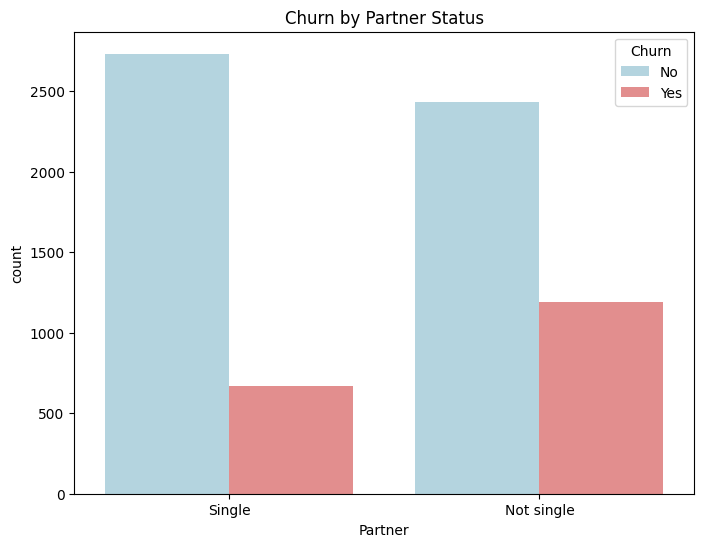

In [11]:
# === 4. PARTNER STATUS VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.xticks(ticks=[0, 1], labels=['Single', 'Not single'])
plt.title('Churn by Partner Status')
plt.show()

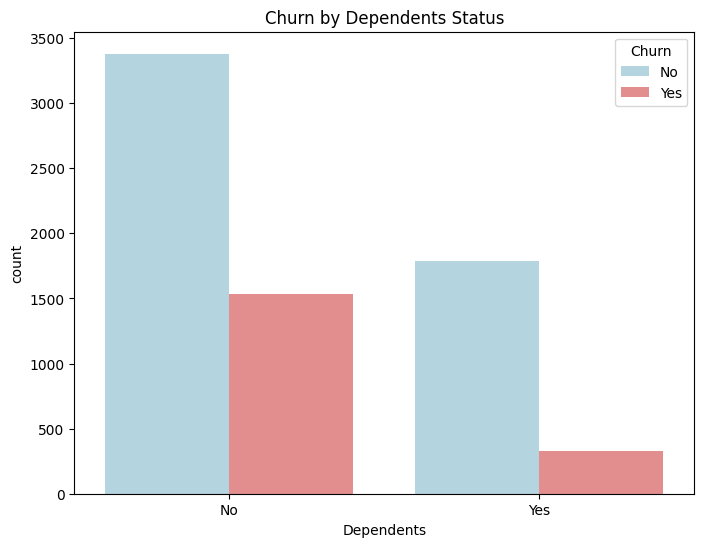

In [12]:
# === 5. DEPENDENTS VS CHURN ===
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Dependents Status')
plt.show()

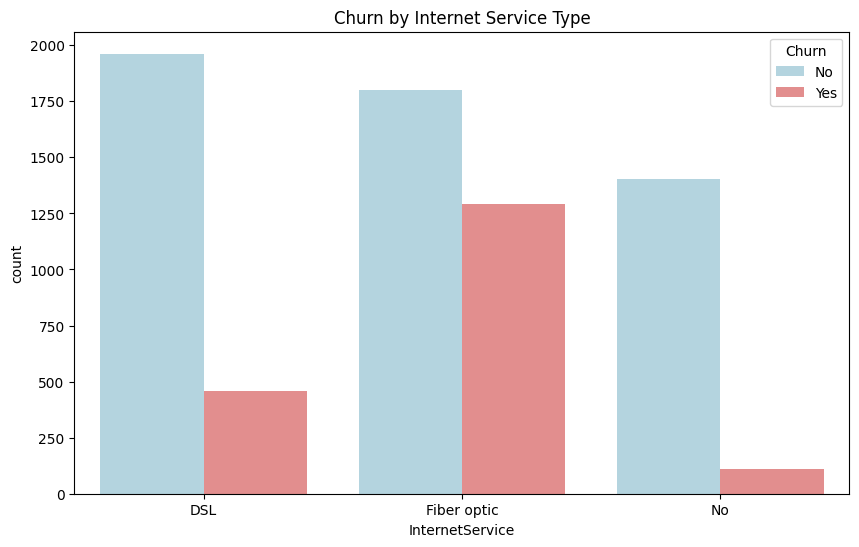

In [13]:
# === 6. INTERNET SERVICE VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Internet Service Type')
plt.show()

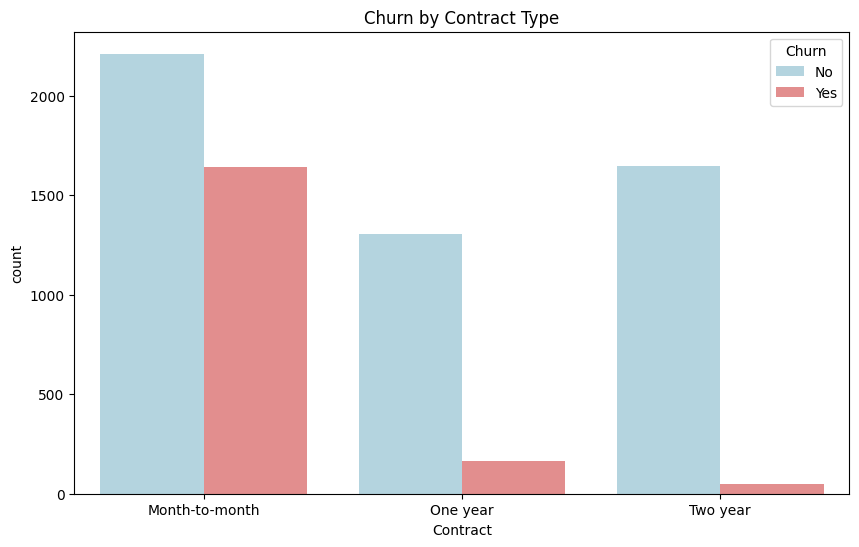

In [14]:
# === 7. CONTRACT TYPE VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Contract Type')
plt.show()

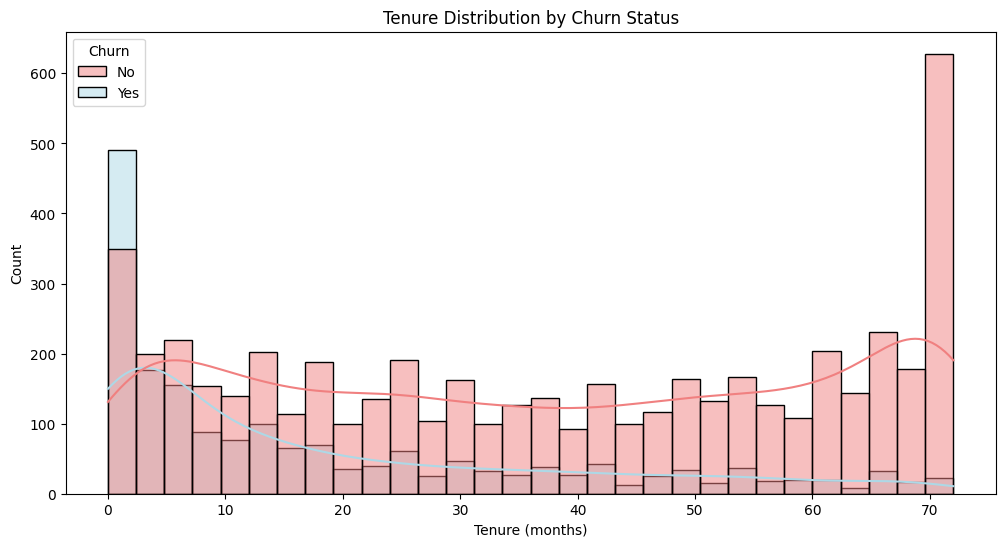

In [15]:
# === 9. TENURE DISTRIBUTION BY CHURN ===
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, palette=['lightcoral','lightblue'])
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (months)')
plt.show()

/tmp/ipython-input-431960456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['lightblue', 'lightcoral'])


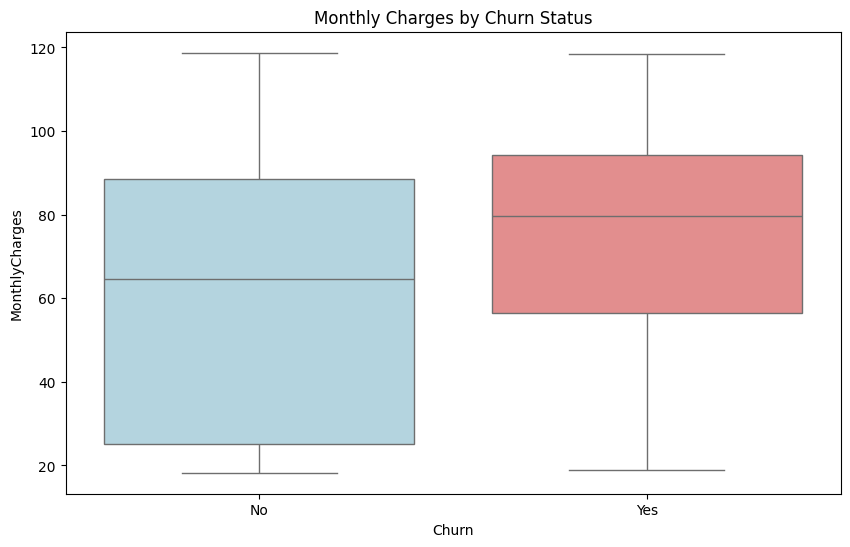

In [16]:
# === 10. MONTHLY CHARGES BY CHURN ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['lightblue', 'lightcoral'])
plt.title('Monthly Charges by Churn Status')
plt.show()

/tmp/ipython-input-1410876182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y='TotalCharges', palette=['lightblue', 'lightcoral'])


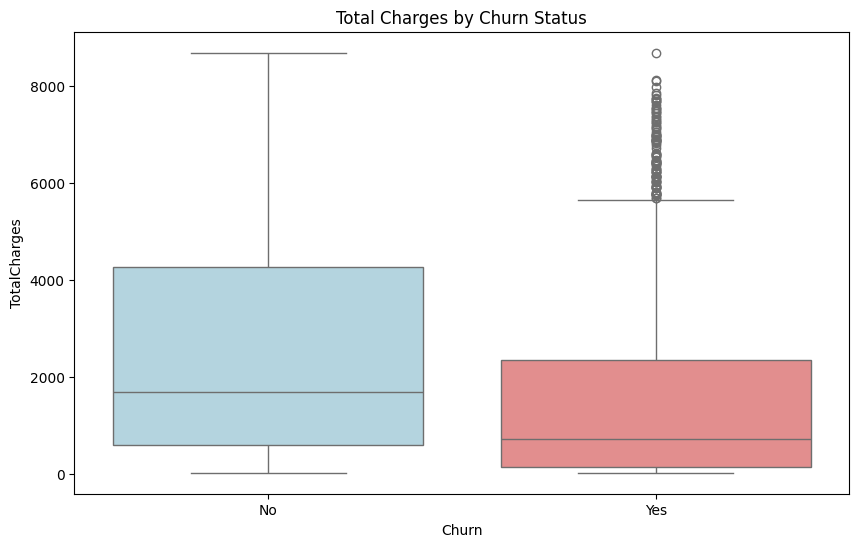

In [17]:
# === 11. TOTAL CHARGES BY CHURN ===
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna(subset=['TotalCharges'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Churn', y='TotalCharges', palette=['lightblue', 'lightcoral'])
plt.title('Total Charges by Churn Status')
plt.show()

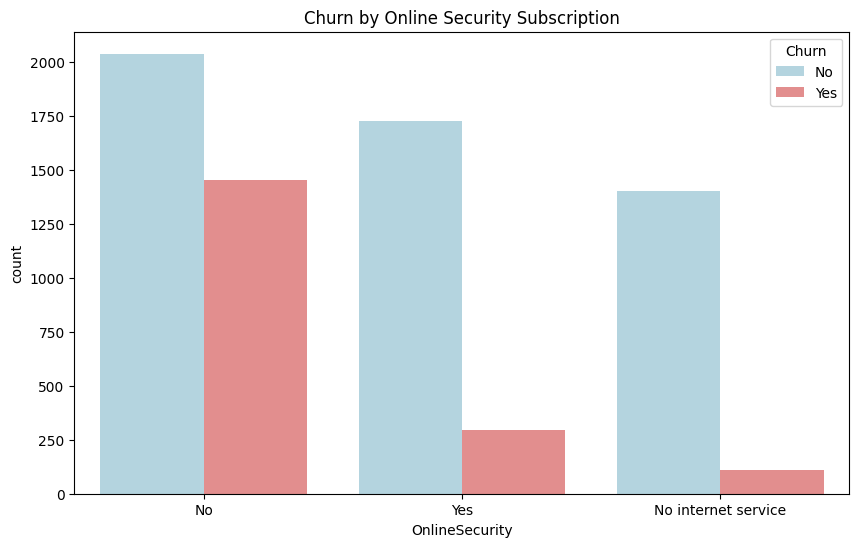

In [18]:
# === 12. ONLINE SECURITY VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Online Security Subscription')
plt.show()

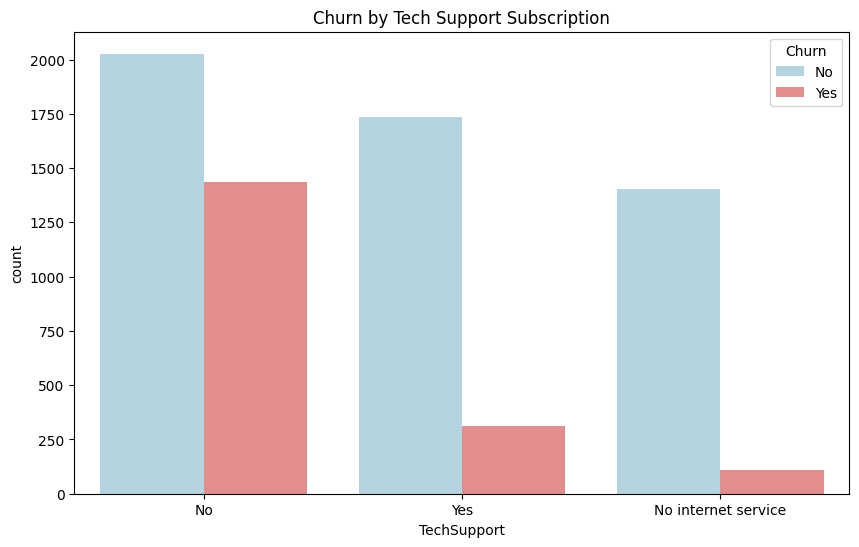

In [19]:
# === 13. TECH SUPPORT VS CHURN ===
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette=['lightblue', 'lightcoral'])
plt.title('Churn by Tech Support Subscription')
plt.show()

In [20]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

# Encoding getting data Ready for ML

In [21]:
from sklearn.preprocessing import LabelEncoder


In [22]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(df["Churn"].value_counts())

Churn
0    5164
1    1857
Name: count, dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
object_columns = df.select_dtypes(include="object").columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

# dont use label encoding
!!!!!!!!

In [26]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# splitting to train and test.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns=["Churn"])
Y = df["Churn"]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print(Y_train.value_counts())

Churn
0    4111
1    1505
Name: count, dtype: int64


as we observe there is an extreme unbalance in the data!!!. to solve that we use Synthetic Minority Oversampling Technique (SMOTE)

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(random_state=42)

In [34]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [35]:
print(Y_train_smote.value_counts())

Churn
1    4111
0    4111
Name: count, dtype: int64


# Model training


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [37]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

In [38]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [39]:
cv_scores

{'Decision Tree': array([0.70820669, 0.70881459, 0.85097324, 0.82420925, 0.84428224]),
 'Random Forest': array([0.74346505, 0.76960486, 0.89781022, 0.89476886, 0.90389294])}

as we observe Random Forest is better.

Training

In [40]:
UsedModel= RandomForestClassifier(random_state=42)
UsedModel.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(random_state=42)

Testing

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
Y_test_pred = UsedModel.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, Y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

Accuracy Score:
 0.7651245551601423
Confsuion Matrix:
 [[874 179]
 [151 201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1053
           1       0.53      0.57      0.55       352

    accuracy                           0.77      1405
   macro avg       0.69      0.70      0.70      1405
weighted avg       0.77      0.77      0.77      1405



Lets save the model and encoders

In [43]:
import pickle
model_data = {"model": UsedModel, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [44]:
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

Load the data.

In [45]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop(columns=['customerID'])

In [46]:
# Randomly select one row from your dataframe
random_slide_data_df = df.sample(n=1, random_state=42)
X_Sample= random_slide_data_df.drop(columns=["Churn"])
Y_Sample= random_slide_data_df["Churn"]
print(X_Sample)
print(Y_Sample)

     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
185  Female              0     Yes         No       1           No   

        MultipleLines InternetService OnlineSecurity OnlineBackup  \
185  No phone service             DSL             No           No   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
185               No          No          No              No  Month-to-month   

    PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges  
185              Yes  Electronic check            24.8         24.8  
185    Yes
Name: Churn, dtype: object


In [47]:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [48]:

# Load the encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    if column in X_Sample.columns:
        X_Sample[column] = encoder.transform(X_Sample[column])
Y_Sample = Y_Sample.map({'Yes': 1, 'No': 0})


In [49]:
print(X_Sample)
print(Y_Sample)

     gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185       0              0        1           0       1             0   

     MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185              1                0               0             0   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
185                 0            0            0                0         0   

     PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  
185                 1              2            24.8         24.8  
185    1
Name: Churn, dtype: int64


In [50]:

# Make a prediction
prediction = loaded_model.predict(X_Sample)
pred_prob = loaded_model.predict_proba(X_Sample)

# Results
print("Selected input data:")
print(X_Sample)
print("\n--- Prediction Results ---")
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'} actual value is {'Churn' if Y_Sample.iloc[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

Selected input data:
     gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185       0              0        1           0       1             0   

     MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185              1                0               0             0   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
185                 0            0            0                0         0   

     PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  
185                 1              2            24.8         24.8  

--- Prediction Results ---
Prediction: Churn actual value is Churn
Prediction Probability: [[0.26 0.74]]


In [51]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Assuming your model is called `rf_model`
# and was trained like rf_model = RandomForestClassifier(...).fit(X_train, y_train)

# Export one tree (e.g., the first one)
tree = loaded_model.estimators_[0]

dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=loaded_model.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # saves it as PDF

'random_forest_tree.pdf'

# INSIGNTS FROM INSTRUCTOR
1- dont use Label encoder even its decumentation says to only use it in the Y not X

2- under graphs put insights

3- dont use SMOTE

4- why use fillna median. it would be better to use worse case because its worse for customer to churn when model says he wont churn

5- dont put useless grapths. it must be removed

# todays session we got production and deplyment


# MileStone 4

# MLflow

In [53]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.6 MB/s eta 0:00:00


2025/11/30 21:21:20 INFO mlflow.tracking.fluent: Experiment with name 'Customer_Churn_Prediction' does not exist. Creating a new experiment.
2025/11/30 21:23:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/30 21:23:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run completed successfully!
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 score: 0.6282


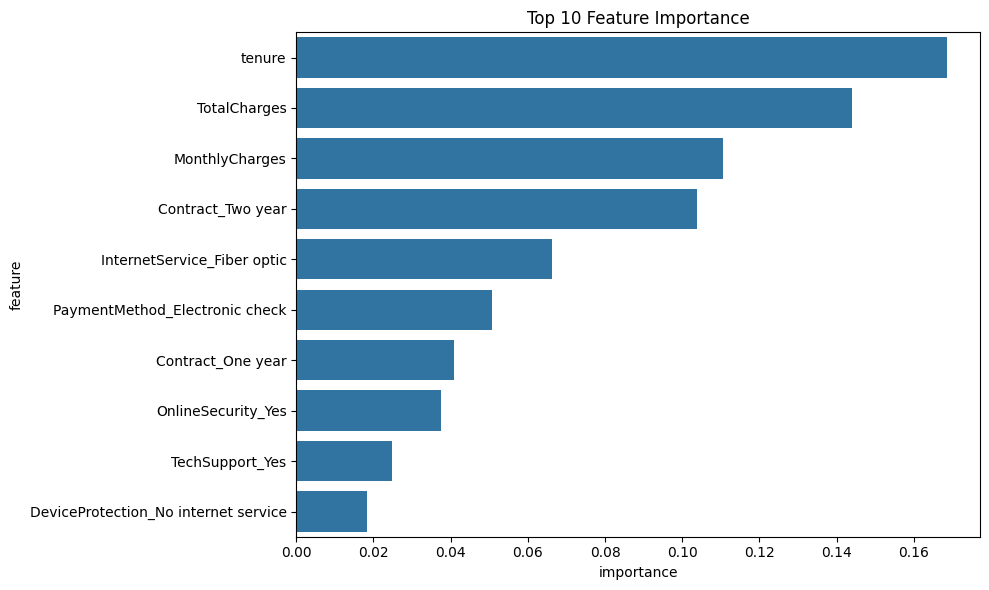

In [54]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Initialize MLflow
mlflow.set_experiment("Customer_Churn_Prediction")

def train_with_mlflow_tracking(X_train, X_test, y_train, y_test):
    """
    Train model with MLflow experiment tracking
    """
    with mlflow.start_run(run_name="RandomForest_Churn_Prediction"):

        # Define hyperparameters for tuning
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }

        # Initialize and train model with GridSearch
        rf = RandomForestClassifier(random_state=42, class_weight='balanced')
        grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get best model
        best_model = grid_search.best_estimator_

        # Make predictions
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Log parameters
        mlflow.log_params(grid_search.best_params_)

        # Log metrics
        mlflow.log_metrics({
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        })

        # Log model
        mlflow.sklearn.log_model(best_model, "random_forest_model")

        # Log artifacts (feature importance plot)
        import matplotlib.pyplot as plt

        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title('Top 10 Feature Importance')
        plt.tight_layout()
        plt.savefig('feature_importance.png')
        mlflow.log_artifact('feature_importance.png')

        print("MLflow run completed successfully!")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best F1 score: {f1:.4f}")

        return best_model

# Load and prepare data (using your existing preprocessing)
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop(columns=['customerID'])
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Use proper encoding (One-Hot Encoding instead of Label Encoding)
categorical_columns = df.select_dtypes(include=['object']).columns.drop('Churn')
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Split data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train with MLflow tracking
best_model = train_with_mlflow_tracking(X_train, X_test, y_train, y_test)

# fast api

In [55]:
# main.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pandas as pd
import numpy as np
import pickle
from typing import List, Optional
import os

# Initialize FastAPI app
app = FastAPI(
    title="Customer Churn Prediction API",
    description="API for predicting customer churn probability",
    version="1.0.0"
)

class CustomerData(BaseModel):
    tenure: int
    MonthlyCharges: float
    TotalCharges: float
    gender: str
    SeniorCitizen: int
    Partner: str
    Dependents: str
    PhoneService: str
    MultipleLines: str
    InternetService: str
    OnlineSecurity: str
    OnlineBackup: str
    DeviceProtection: str
    TechSupport: str
    StreamingTV: str
    StreamingMovies: str
    Contract: str
    PaperlessBilling: str
    PaymentMethod: str

class PredictionResponse(BaseModel):
    churn_probability: float
    churn_prediction: int
    prediction_class: str
    confidence: str

# Global variables for model and preprocessors
model = None
encoders = None
feature_names = None

def load_artifacts():
    """Load model and encoders"""
    global model, encoders, feature_names

    try:
        with open("customer_churn_model.pkl", "rb") as f:
            model_data = pickle.load(f)
        model = model_data["model"]
        feature_names = model_data["features_names"]

        with open("encoders.pkl", "rb") as f:
            encoders = pickle.load(f)

        print("✅ Model and encoders loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading artifacts: {e}")

def preprocess_input(data: CustomerData) -> pd.DataFrame:
    """Preprocess input data for prediction"""
    # Convert to dictionary and then to DataFrame
    input_dict = data.dict()
    input_df = pd.DataFrame([input_dict])

    # Apply label encoding using saved encoders
    for column, encoder in encoders.items():
        if column in input_df.columns:
            # Handle unseen labels
            input_df[column] = input_df[column].apply(
                lambda x: x if x in encoder.classes_ else encoder.classes_[0]
            )
            input_df[column] = encoder.transform(input_df[column])

    # Ensure all features are present and in correct order
    for feature in feature_names:
        if feature not in input_df.columns:
            input_df[feature] = 0

    return input_df[feature_names]

@app.on_event("startup")
async def startup_event():
    """Load model on startup"""
    load_artifacts()

@app.get("/")
async def root():
    return {
        "message": "Customer Churn Prediction API",
        "status": "active",
        "version": "1.0.0"
    }

@app.get("/health")
async def health_check():
    return {
        "status": "healthy",
        "model_loaded": model is not None,
        "timestamp": pd.Timestamp.now().isoformat()
    }

@app.get("/model-info")
async def model_info():
    """Get information about the loaded model"""
    if model is None:
        raise HTTPException(status_code=500, detail="Model not loaded")

    return {
        "model_type": type(model).__name__,
        "features": feature_names,
        "n_features": len(feature_names),
        "feature_importance": dict(zip(feature_names, model.feature_importances_.tolist()))
    }

@app.post("/predict", response_model=PredictionResponse)
async def predict_churn(customer_data: CustomerData):
    """Predict churn for a single customer"""
    if model is None:
        raise HTTPException(status_code=500, detail="Model not loaded")

    try:
        # Preprocess input
        input_df = preprocess_input(customer_data)

        # Make prediction
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[0][1]

        # Determine confidence level
        if prediction_proba > 0.7 or prediction_proba < 0.3:
            confidence = "high"
        elif prediction_proba > 0.6 or prediction_proba < 0.4:
            confidence = "medium"
        else:
            confidence = "low"

        return PredictionResponse(
            churn_probability=float(prediction_proba),
            churn_prediction=int(prediction),
            prediction_class="Churn" if prediction == 1 else "No Churn",
            confidence=confidence
        )

    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Prediction error: {str(e)}")

@app.post("/batch_predict")
async def batch_predict(customers_data: List[CustomerData]):
    """Predict churn for multiple customers"""
    if model is None:
        raise HTTPException(status_code=500, detail="Model not loaded")

    try:
        predictions = []
        for i, customer_data in enumerate(customers_data):
            input_df = preprocess_input(customer_data)

            prediction = model.predict(input_df)[0]
            prediction_proba = model.predict_proba(input_df)[0][1]

            predictions.append({
                "customer_id": i,
                "churn_probability": float(prediction_proba),
                "churn_prediction": int(prediction),
                "prediction_class": "Churn" if prediction == 1 else "No Churn",
                "confidence": "high" if prediction_proba > 0.7 or prediction_proba < 0.3 else
                            "medium" if prediction_proba > 0.6 or prediction_proba < 0.4 else "low"
            })

        return {
            "total_customers": len(predictions),
            "churn_count": sum(1 for p in predictions if p["churn_prediction"] == 1),
            "predictions": predictions
        }

    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Batch prediction error: {str(e)}")

# Remove the if __name__ == "__main__" block for production

In [56]:
# run_api.py
import uvicorn

if __name__ == "__main__":
    uvicorn.run(
        "main:app",
        host="0.0.0.0",
        port=8000,
        reload=True,  # This will work now
        log_level="info"
    )

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [222] using StatReload
INFO:     Stopping reloader process [222]


# dashboard

In [59]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.1 MB/s eta 0:00:00


In [60]:
# dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

# Page configuration
st.set_page_config(
    page_title="Customer Churn Prediction Dashboard",
    page_icon="📊",
    layout="wide"
)

# API configuration
API_URL = "http://localhost:8000"

class ChurnDashboard:
    def __init__(self):
        self.setup_sidebar()

    def setup_sidebar(self):
        st.sidebar.title("🔮 Churn Prediction Dashboard")
        st.sidebar.markdown("---")

        self.page = st.sidebar.radio(
            "Navigation",
            ["Single Prediction", "Batch Analysis", "Model Info", "API Health"]
        )

        st.sidebar.markdown("---")
        st.sidebar.info("""
        **Team DEPI Members:**
        - Michael Mohab Soltan Nashed
        - Hazem Mohamed Salem
        - Marwan Ahmed Salah Ahmed
        - Kareem Moataz
        - Ibrahim Emam
        - Mohamed Tawfik
        """)

    def check_api_health(self):
        """Check if API is running"""
        try:
            response = requests.get(f"{API_URL}/health", timeout=5)
            return response.status_code == 200, response.json()
        except:
            return False, {}

    def render_single_prediction(self):
        st.title("🔍 Single Customer Churn Prediction")

        # Check API health
        api_healthy, health_info = self.check_api_health()
        if not api_healthy:
            st.error("❌ API server is not running. Please start the API server first.")
            st.code("python run_api.py", language="bash")
            return

        st.success("✅ API server is running!")

        # Create input form
        with st.form("customer_data_form"):
            col1, col2 = st.columns(2)

            with col1:
                st.subheader("Personal Information")
                gender = st.selectbox("Gender", ["Female", "Male"])
                senior_citizen = st.selectbox("Senior Citizen", ["No", "Yes"])
                partner = st.selectbox("Partner", ["No", "Yes"])
                dependents = st.selectbox("Dependents", ["No", "Yes"])

                st.subheader("Account Information")
                tenure = st.slider("Tenure (months)", 0, 72, 12)
                contract = st.selectbox("Contract", ["Month-to-month", "One year", "Two year"])
                paperless_billing = st.selectbox("Paperless Billing", ["No", "Yes"])
                payment_method = st.selectbox("Payment Method", [
                    "Electronic check", "Mailed check", "Bank transfer (automatic)",
                    "Credit card (automatic)"
                ])

            with col2:
                st.subheader("Service Information")
                phone_service = st.selectbox("Phone Service", ["No", "Yes"])
                multiple_lines = st.selectbox("Multiple Lines", ["No phone service", "No", "Yes"])
                internet_service = st.selectbox("Internet Service", ["No", "DSL", "Fiber optic"])
                online_security = st.selectbox("Online Security", ["No internet service", "No", "Yes"])
                online_backup = st.selectbox("Online Backup", ["No internet service", "No", "Yes"])
                device_protection = st.selectbox("Device Protection", ["No internet service", "No", "Yes"])
                tech_support = st.selectbox("Tech Support", ["No internet service", "No", "Yes"])
                streaming_tv = st.selectbox("Streaming TV", ["No internet service", "No", "Yes"])
                streaming_movies = st.selectbox("Streaming Movies", ["No internet service", "No", "Yes"])

                st.subheader("Billing Information")
                monthly_charges = st.slider("Monthly Charges ($)", 18.0, 120.0, 50.0)
                total_charges = st.slider("Total Charges ($)", 0.0, 10000.0, 1000.0)

            # Submit button
            submitted = st.form_submit_button("Predict Churn", type="primary")

        if submitted:
            # Prepare data for API
            customer_data = {
                "tenure": tenure,
                "MonthlyCharges": monthly_charges,
                "TotalCharges": total_charges,
                "gender": gender,
                "SeniorCitizen": 1 if senior_citizen == "Yes" else 0,
                "Partner": partner,
                "Dependents": dependents,
                "PhoneService": phone_service,
                "MultipleLines": multiple_lines,
                "InternetService": internet_service,
                "OnlineSecurity": online_security,
                "OnlineBackup": online_backup,
                "DeviceProtection": device_protection,
                "TechSupport": tech_support,
                "StreamingTV": streaming_tv,
                "StreamingMovies": streaming_movies,
                "Contract": contract,
                "PaperlessBilling": paperless_billing,
                "PaymentMethod": payment_method
            }

            # Make prediction
            with st.spinner("Making prediction..."):
                try:
                    response = requests.post(f"{API_URL}/predict", json=customer_data)

                    if response.status_code == 200:
                        result = response.json()
                        self.display_prediction_result(result, customer_data)
                    else:
                        st.error(f"Prediction failed: {response.text}")

                except Exception as e:
                    st.error(f"Error making prediction: {str(e)}")

    def display_prediction_result(self, result, customer_data):
        """Display prediction results"""
        st.markdown("---")
        st.subheader("🎯 Prediction Results")

        # Create metrics
        col1, col2, col3, col4 = st.columns(4)

        with col1:
            prob = result["churn_probability"]
            st.metric("Churn Probability", f"{prob:.1%}")

        with col2:
            prediction = result["prediction_class"]
            st.metric("Prediction", prediction)

        with col3:
            confidence = result["confidence"]
            st.metric("Confidence", confidence.title())

        with col4:
            risk_color = "🔴" if result["churn_prediction"] == 1 else "🟢"
            st.metric("Risk Level", risk_color)

        # Visualize probability
        fig, ax = plt.subplots(figsize=(10, 2))
        colors = ['green', 'red'] if result["churn_prediction"] == 1 else ['red', 'green']
        ax.barh(['No Churn', 'Churn'],
                [1 - prob, prob],
                color=colors,
                alpha=0.6)
        ax.set_xlim(0, 1)
        ax.set_xlabel('Probability')
        ax.axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Boundary')
        ax.legend()
        st.pyplot(fig)

        # Display recommendations
        st.subheader("💡 Recommendations")
        if result["churn_prediction"] == 1:
            st.warning("**High Churn Risk Detected!**")
            st.write("""
            **Immediate Actions Recommended:**
            - 🎯 Proactive retention campaign
            - 💬 Personal customer service contact
            - 🎁 Special loyalty incentives
            - 📊 Review service quality issues
            """)
        else:
            st.success("**Low Churn Risk**")
            st.write("""
            **Maintenance Actions:**
            - ✅ Continue current service quality
            - 📈 Monitor satisfaction metrics
            - 🎉 Occasional engagement campaigns
            """)

    def render_batch_analysis(self):
        st.title("📊 Batch Analysis")
        st.info("Batch analysis feature - upload CSV file with customer data")

        uploaded_file = st.file_uploader("Upload CSV file", type="csv")

        if uploaded_file is not None:
            try:
                df = pd.read_csv(uploaded_file)
                st.write("**Data Preview:**")
                st.dataframe(df.head())

                if st.button("Analyze Batch", type="primary"):
                    st.info("Batch analysis would be implemented here with the API")
                    # Implementation for batch processing would go here
            except Exception as e:
                st.error(f"Error: {e}")

    def render_model_info(self):
        st.title("🤖 Model Information")

        api_healthy, _ = self.check_api_health()
        if not api_healthy:
            st.error("API server is not running")
            return

        try:
            response = requests.get(f"{API_URL}/health")
            if response.status_code == 200:
                health_info = response.json()
                st.success("✅ Model is loaded and ready!")
                st.json(health_info)
            else:
                st.error("Failed to get model info")
        except Exception as e:
            st.error(f"Error: {e}")

    def render_api_health(self):
        st.title("🏥 API Health Monitor")

        healthy, health_info = self.check_api_health()

        if healthy:
            st.success("✅ API is healthy and running")
            st.json(health_info)

            # Test prediction with sample data
            if st.button("Test API with Sample Data"):
                sample_data = {
                    "tenure": 12,
                    "MonthlyCharges": 50.0,
                    "TotalCharges": 600.0,
                    "gender": "Male",
                    "SeniorCitizen": 0,
                    "Partner": "Yes",
                    "Dependents": "No",
                    "PhoneService": "Yes",
                    "MultipleLines": "No",
                    "InternetService": "DSL",
                    "OnlineSecurity": "Yes",
                    "OnlineBackup": "No",
                    "DeviceProtection": "Yes",
                    "TechSupport": "No",
                    "StreamingTV": "Yes",
                    "StreamingMovies": "No",
                    "Contract": "Month-to-month",
                    "PaperlessBilling": "Yes",
                    "PaymentMethod": "Electronic check"
                }

                try:
                    response = requests.post(f"{API_URL}/predict", json=sample_data)
                    if response.status_code == 200:
                        result = response.json()
                        st.success("✅ Sample prediction successful!")
                        st.json(result)
                    else:
                        st.error(f"❌ Sample prediction failed: {response.text}")
                except Exception as e:
                    st.error(f"❌ Test failed: {e}")
        else:
            st.error("❌ API is not responding")
            st.code("""
# To start the API server, run:
python run_api.py

# Or for simple version:
python simple_api.py

# Then access:
# API: http://localhost:8000
# Docs: http://localhost:8000/docs
# Dashboard: http://localhost:8501
            """, language="bash")

    def run(self):
        if self.page == "Single Prediction":
            self.render_single_prediction()
        elif self.page == "Batch Analysis":
            self.render_batch_analysis()
        elif self.page == "Model Info":
            self.render_model_info()
        elif self.page == "API Health":
            self.render_api_health()

if __name__ == "__main__":
    dashboard = ChurnDashboard()
    dashboard.run()

2025-11-30 21:26:12.402 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 21:26:12.423 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 21:26:13.372 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-30 21:26:13.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 21:26:13.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 21:26:13.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 21:26:13.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

# model

In [61]:
# monitoring/model_monitor.py
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json
import warnings
warnings.filterwarnings('ignore')

class ModelMonitor:
    def __init__(self, model, reference_data):
        self.model = model
        self.reference_data = reference_data
        self.predictions_log = []
        self.performance_metrics = []

    def log_prediction(self, input_data, prediction, probability, actual=None):
        """Log prediction for monitoring"""
        log_entry = {
            'timestamp': datetime.now(),
            'input_data': input_data,
            'prediction': prediction,
            'probability': probability,
            'actual': actual
        }
        self.predictions_log.append(log_entry)

        # Keep only last 10,000 predictions
        if len(self.predictions_log) > 10000:
            self.predictions_log = self.predictions_log[-10000:]

    def detect_data_drift(self, current_data):
        """Detect data drift using statistical tests"""
        drift_detected = False
        drift_report = {}

        for column in current_data.columns:
            if column in self.reference_data.columns:
                # KS test for numerical columns
                from scipy.stats import ks_2samp
                stat, p_value = ks_2samp(
                    self.reference_data[column].dropna(),
                    current_data[column].dropna()
                )

                if p_value < 0.05:  # Significant drift detected
                    drift_detected = True
                    drift_report[column] = {
                        'statistic': stat,
                        'p_value': p_value,
                        'drift_detected': True
                    }

        return drift_detected, drift_report

    def detect_concept_drift(self, recent_labels):
        """Detect concept drift by monitoring performance degradation"""
        if len(recent_labels) < 100:
            return False, "Insufficient data for concept drift detection"

        # Calculate current performance
        recent_predictions = [log['prediction'] for log in self.predictions_log[-100:]]
        recent_actuals = recent_labels

        from sklearn.metrics import accuracy_score
        current_accuracy = accuracy_score(recent_actuals, recent_predictions)

        # Compare with reference performance (assuming 82% baseline)
        reference_accuracy = 0.82

        if current_accuracy < reference_accuracy - 0.05:  # 5% degradation
            return True, f"Concept drift detected: Accuracy dropped from {reference_accuracy:.2f} to {current_accuracy:.2f}"

        return False, f"No concept drift detected. Current accuracy: {current_accuracy:.2f}"

    def generate_monitoring_report(self):
        """Generate comprehensive monitoring report"""
        report = {
            'timestamp': datetime.now().isoformat(),
            'total_predictions': len(self.predictions_log),
            'data_drift_detected': False,
            'concept_drift_detected': False,
            'model_health': 'Healthy'
        }

        # Analyze prediction distribution
        if self.predictions_log:
            recent_probs = [log['probability'] for log in self.predictions_log[-1000:]]
            report['avg_prediction_probability'] = np.mean(recent_probs)
            report['prediction_distribution'] = {
                'high_risk': len([p for p in recent_probs if p > 0.7]),
                'medium_risk': len([p for p in recent_probs if 0.3 <= p <= 0.7]),
                'low_risk': len([p for p in recent_probs if p < 0.3])
            }

        return report

# Retraining strategy
class ModelRetrainingStrategy:
    def __init__(self, model, retraining_interval=30):
        self.model = model
        self.retraining_interval = retraining_interval
        self.last_retraining_date = datetime.now()

    def should_retrain(self, drift_detected=False, performance_degradation=False):
        """Determine if model should be retrained"""
        time_since_retraining = (datetime.now() - self.last_retraining_date).days

        conditions = [
            time_since_retraining >= self.retraining_interval,
            drift_detected,
            performance_degradation
        ]

        return any(conditions)

    def retrain_model(self, new_data, new_labels):
        """Retrain model with new data"""
        print("Starting model retraining...")

        # Retrain the model
        self.model.fit(new_data, new_labels)

        # Update retraining date
        self.last_retraining_date = datetime.now()

        print("Model retraining completed successfully!")
        return self.model

# Usage example
if __name__ == "__main__":
    # Initialize monitor with reference data
    monitor = ModelMonitor(best_model, X_train)

    # Generate sample monitoring report
    report = monitor.generate_monitoring_report()
    print("Model Monitoring Report:")
    print(json.dumps(report, indent=2))

Model Monitoring Report:
{
  "timestamp": "2025-11-30T21:26:15.112977",
  "total_predictions": 0,
  "data_drift_detected": false,
  "concept_drift_detected": false,
  "model_health": "Healthy"
}


# local deploy

In [66]:
# Cell 1 — Environment info and minimal packages
# Run this first. It prepares the environment and shows uploaded files.

# Show runtime
import sys, os, json, shutil
print("Python:", sys.version)
print("Platform:", sys.platform)
print("Working dir:", os.getcwd())

# List files in /mnt/data and root
print("\nFiles in /mnt/data:")
for p in os.listdir("/content"):
    print(" -", p)

# We'll use sklearn, pandas, joblib/pickle, tkinter will be needed locally (not in Colab UI)
!pip install -q scikit-learn pandas matplotlib seaborn imbalanced-learn graphviz mlflow
# PyInstaller and wine are optional — will be installed later in a best-effort step.
print("Installed core Python packages.")


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platform: linux
Working dir: /content

Files in /mnt/data:
 - .config
 - random_forest_tree.pdf
 - feature_importance.png
 - mlruns
 - customer_churn_model.pkl
 - random_forest_tree
 - encoders.pkl
 - sample_data
Installed core Python packages.


In [67]:
# Cell 2 — Create or restore model & encoders
# This cell tries to use the uploaded script (copy_of_depi_project_churn.py) if present to create 'customer_churn_model.pkl' and 'encoders.pkl'.
# If not present, it will train a simple RandomForest on the telco dataset (downloaded via kagglehub if available in your script).
import os, pickle, shutil, sys
from pathlib import Path

BASE_DIR = Path("/content/churn_app_package")
BASE_DIR.mkdir(exist_ok=True)

# If user uploaded pickles already, copy them into package
uploaded_model = Path("customer_churn_model.pkl")
uploaded_enc = Path("encoders.pkl")

if uploaded_model.exists() and uploaded_enc.exists():
    print("Found existing pickles in root — copying to package.")
    shutil.copy(uploaded_model, BASE_DIR / "customer_churn_model.pkl")
    shutil.copy(uploaded_enc, BASE_DIR / "encoders.pkl")
else:
    # Try to run or import the uploaded script to produce pickles
    script = Path("/mnt/data/copy_of_depi_project_churn.py")
    if script.exists():
        print("Attempting to run uploaded script to produce model files (best-effort).")
        # Run it in a subshell — it may create pkl files in current directory
        !python3 /mnt/data/copy_of_depi_project_churn.py || true
        # Check again
        if uploaded_model.exists() and uploaded_enc.exists():
            shutil.copy(uploaded_model, BASE_DIR / "customer_churn_model.pkl")
            shutil.copy(uploaded_enc, BASE_DIR / "encoders.pkl")
            print("Model and encoders created and copied.")
        else:
            print("Uploaded script did not produce pickles. Will train a compact model now.")
    else:
        print("No uploaded script found. Will train a compact model now.")

# If still missing, train a compact model quickly using telco dataset from Kaggle if accessible,
# or simulate a small model using scikit-learn's make_classification as a fallback.
if not (BASE_DIR / "customer_churn_model.pkl").exists() or not (BASE_DIR / "encoders.pkl").exists():
    print("Training compact example model (fallback).")
    import pandas as pd, numpy as np
    # Try to load dataset from internet (may fail in some Colab environments). We'll try common sources fallback.
    try:
        # Try to fetch telco dataset from GitHub mirror (public)
        url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
        df = pd.read_csv(url)
        print("Telco dataset loaded from GitHub.")
    except Exception as e:
        print("Failed to load telco dataset:", e)
        from sklearn.datasets import make_classification
        X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
        df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])
        df["Churn"] = y
        print("Using synthetic dataset.")

    # Basic preprocessing
    # If dataset has TotalCharges as string, handle it:
    if "TotalCharges" in df.columns:
        df = df.rename(columns={c:c.strip() for c in df.columns})
        df = df.drop(columns=[c for c in ["customerID"] if c in df.columns], errors="ignore")
        df['TotalCharges'] = df.get('TotalCharges').replace(" ", np.nan)
        try:
            df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
            df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
        except Exception:
            pass

    # Convert object columns using simple LabelEncoder fallback
    from sklearn.preprocessing import LabelEncoder
    encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        if col == "Churn": continue
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

    if "Churn" in df.columns and df["Churn"].dtype == object:
        df["Churn"] = df["Churn"].map({"Yes":1,"No":0}).fillna(df["Churn"]).astype(int)

    # Train a RandomForest
    from sklearn.ensemble import RandomForestClassifier
    X = df.drop(columns=["Churn"]) if "Churn" in df.columns else df.drop(columns=["f0"])
    y = df["Churn"] if "Churn" in df.columns else df["f0"]
    # If synthetic, pick first column as y
    if len(y.unique())==2:
        pass
    else:
        # fallback: create a binary y
        y = (np.random.rand(len(X))>0.5).astype(int)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Save model and (possibly empty) encoders
    model_data = {"model": model, "features_names": list(X.columns)}
    with open(BASE_DIR / "customer_churn_model.pkl", "wb") as f:
        pickle.dump(model_data, f)
    with open(BASE_DIR / "encoders.pkl", "wb") as f:
        pickle.dump(encoders, f)
    print("Fallback model trained and artifacts saved to:", BASE_DIR)


Found existing pickles in root — copying to package.


In [68]:
# Cell 3 — Write the Tkinter GUI (app.py)
# This GUI:
# - Loads customer_churn_model.pkl and encoders.pkl from the same folder
# - Provides dropdowns/sliders for the major inputs
# - Preprocesses using encoders if available and produces prediction + probability
app_py = r'''
import tkinter as tk
from tkinter import ttk, messagebox
import pickle
import numpy as np
import pandas as pd
import os

HERE = os.path.dirname(os.path.abspath(__file__))

# Load model & encoders
with open(os.path.join(HERE, "customer_churn_model.pkl"), "rb") as f:
    model_data = pickle.load(f)
model = model_data["model"]
FEATURES = model_data.get("features_names", None)

encoders = {}
enc_path = os.path.join(HERE, "encoders.pkl")
if os.path.exists(enc_path):
    with open(enc_path, "rb") as f:
        encoders = pickle.load(f)

# Basic GUI-building utility
root = tk.Tk()
root.title("Telco Customer Churn - Prediction")
root.geometry("760x560")

mainframe = ttk.Frame(root, padding="12 12 12 12")
mainframe.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

# Input fields (kept minimal — map to common features)
# We will attempt to handle unknowns by zero-filling missing features
inputs = {}
def add_label_combo(row, label, options, var_name, default=None):
    ttk.Label(mainframe, text=label).grid(column=0, row=row, sticky=tk.W, padx=4, pady=6)
    v = tk.StringVar(value=default if default is not None else options[0])
    cb = ttk.Combobox(mainframe, textvariable=v, values=options, state="readonly", width=28)
    cb.grid(column=1, row=row, sticky=(tk.W))
    inputs[var_name] = v

def add_label_entry(row, label, var_name, default=""):
    ttk.Label(mainframe, text=label).grid(column=0, row=row, sticky=tk.W, padx=4, pady=6)
    v = tk.StringVar(value=default)
    e = ttk.Entry(mainframe, textvariable=v, width=30)
    e.grid(column=1, row=row, sticky=(tk.W))
    inputs[var_name] = v

# Create fields (common ones from Telco dataset)
add_label_combo(0, "Gender", ["Female", "Male"], "gender", "Male")
add_label_combo(1, "Senior Citizen", ["0", "1"], "SeniorCitizen", "0")
add_label_combo(2, "Partner", ["No", "Yes"], "Partner", "No")
add_label_combo(3, "Dependents", ["No", "Yes"], "Dependents", "No")
add_label_combo(4, "Phone Service", ["No", "Yes"], "PhoneService", "Yes")
add_label_combo(5, "Multiple Lines", ["No phone service", "No", "Yes"], "MultipleLines", "No")
add_label_combo(6, "Internet Service", ["No", "DSL", "Fiber optic"], "InternetService", "DSL")
add_label_combo(7, "Online Security", ["No internet service", "No", "Yes"], "OnlineSecurity", "No")
add_label_combo(8, "Online Backup", ["No internet service", "No", "Yes"], "OnlineBackup", "No")
add_label_combo(9, "Device Protection", ["No internet service", "No", "Yes"], "DeviceProtection", "No")
add_label_combo(10, "Tech Support", ["No internet service", "No", "Yes"], "TechSupport", "No")
add_label_combo(11, "Streaming TV", ["No internet service", "No", "Yes"], "StreamingTV", "No")
add_label_combo(12, "Streaming Movies", ["No internet service", "No", "Yes"], "StreamingMovies", "No")
add_label_combo(13, "Contract", ["Month-to-month", "One year", "Two year"], "Contract", "Month-to-month")
add_label_combo(14, "Paperless Billing", ["No", "Yes"], "PaperlessBilling", "Yes")
add_label_combo(15, "Payment Method", ["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"], "PaymentMethod", "Electronic check")

add_label_entry(16, "Tenure (months)", "tenure", "12")
add_label_entry(17, "Monthly Charges", "MonthlyCharges", "50.0")
add_label_entry(18, "Total Charges", "TotalCharges", "600.0")

# Output area
out_frame = ttk.LabelFrame(mainframe, text="Prediction", padding="10 10 10 10")
out_frame.grid(column=2, row=0, rowspan=8, padx=12, pady=12, sticky=(tk.N, tk.E))

pred_text = tk.Text(out_frame, width=36, height=14, wrap="word")
pred_text.grid(column=0, row=0)

def preprocess_and_predict():
    # Build input dict
    data = {}
    for k,v in inputs.items():
        val = v.get()
        # map numeric-looking fields
        if k in ["tenure","MonthlyCharges","TotalCharges"]:
            try:
                data[k] = float(val)
            except:
                data[k] = 0.0
        else:
            data[k] = val

    # Create DataFrame with columns matching FEATURES if possible
    if FEATURES is None:
        # no feature names: try simple column ordering
        X = pd.DataFrame([data])
    else:
        X = pd.DataFrame([data])
        # Apply encoders if available
        for col, enc in encoders.items():
            if col in X.columns:
                # If value not in classes_, pick first class then transform
                val = X.loc[0,col]
                if val not in enc.classes_:
                    # find a closest fallback
                    X.loc[0,col] = enc.classes_[0]
                else:
                    X.loc[0,col] = val
                try:
                    X.loc[:,col] = enc.transform(X.loc[:,col])
                except Exception:
                    # If transform fails, map unknowns to zero
                    X.loc[:,col] = 0

        # Ensure all FEATURES exist
        for f in FEATURES:
            if f not in X.columns:
                X[f] = 0

        X = X[FEATURES]

    # Make prediction
    try:
        pred = model.predict(X)[0]
        proba = model.predict_proba(X)[0][1] if hasattr(model, "predict_proba") else None
    except Exception as e:
        messagebox.showerror("Model error", f"Prediction failed: {e}")
        return

    # Display
    pred_text.delete("1.0", tk.END)
    pred_text.insert(tk.END, f"Prediction: {'Churn' if pred==1 else 'No Churn'}\\n")
    if proba is not None:
        pred_text.insert(tk.END, f"Churn probability: {proba:.4f}\\n")
        conf = "high" if proba>=0.7 or proba<=0.3 else ("medium" if proba>=0.6 or proba<=0.4 else "low")
        pred_text.insert(tk.END, f"Confidence: {conf}\\n")
    pred_text.insert(tk.END, "\\nInput summary:\\n")
    for k in data:
        pred_text.insert(tk.END, f"- {k}: {data[k]}\\n")

# Buttons
btn_frame = ttk.Frame(mainframe)
btn_frame.grid(column=0, row=20, columnspan=2, pady=10)
ttk.Button(btn_frame, text="Predict", command=preprocess_and_predict).grid(column=0, row=0, padx=8)
ttk.Button(btn_frame, text="Quit", command=root.destroy).grid(column=1, row=0, padx=8)

# Padding
for child in mainframe.winfo_children():
    child.grid_configure(padx=6, pady=4)

root.mainloop()
'''
# Save to package folder
with open(BASE_DIR / "app.py", "w", encoding="utf-8") as f:
    f.write(app_py)
print("app.py written to:", BASE_DIR / "app.py")


app.py written to: /content/churn_app_package/app.py


In [69]:
# Cell 4 — Write requirements.txt, README and build instructions
reqs = """
scikit-learn
pandas
numpy
tk
"""

# PyInstaller spec and simple one-line batch for Windows (to be run on an actual Windows PC)
build_instructions = r"""
BUILD OPTIONS (recommended, on a Windows PC)
--------------------------------------------
1) Copy the entire extracted folder to a Windows PC.
2) Install Python 3.8+ on Windows and ensure pip is available.
3) Open an elevated CMD or PowerShell in that folder.
4) (Optional) create venv:
   python -m venv venv
   venv\Scripts\activate

5) Install PyInstaller:
   pip install pyinstaller

6) Build exe:
   pyinstaller --onefile --noconsole app.py

7) The built exe will appear in the 'dist' folder: dist\\app.exe

ALTERNATIVE (if you want a GUI and icon):
   pyinstaller --onefile --windowed --icon=app.ico app.py

WINE (Linux) attempt:
---------------------
We also attempt a wine-based build in Colab (best-effort). This may fail depending on the environment.
If it fails, follow the Windows steps above on a Windows machine.
"""

with open(BASE_DIR / "requirements.txt", "w") as f:
    f.write("scikit-learn\npandas\nnumpy\n")
with open(BASE_DIR / "build_instructions.txt", "w") as f:
    f.write(build_instructions)
print("Wrote requirements and build instructions.")


Wrote requirements and build instructions.


In [70]:
# Cell 5 — Zip everything into churn_app_package.zip for download
import shutil
zip_path = "/content/churn_app_package.zip"
if os.path.exists(zip_path):
    os.remove(zip_path)
shutil.make_archive("/content/churn_app_package", "zip", BASE_DIR)
print("Packaged app into:", zip_path)

# Provide a download link (Colab environment)
from google.colab import files
print("Starting file download (the notebook will prompt). If download doesn't start, use the Files sidebar to get /content/churn_app_package.zip")
files.download(zip_path)


Packaged app into: /content/churn_app_package.zip
Starting file download (the notebook will prompt). If download doesn't start, use the Files sidebar to get /content/churn_app_package.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>